1.PROJE

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv("samples.csv")

In [3]:
df.head()

,'Time and date','Fc5.','Fc3.','Fc1.','Fcz.','Fc2.','Fc4.','Fc6.','C5..','C3..',...,'Po7.','Po3.','Poz.','Po4.','Po8.','O1..','Oz..','O2..','Iz..','EDF Annotations'
0,'hh:mm:ss.mmm dd/mm/yyyy','uV','uV','uV','uV','uV','uV','uV','uV','uV',...,'uV','uV','uV','uV','uV','uV','uV','uV','uV','-'
1,'[16:15:00.000 12/08/2009]',-16.000,-29.000,2.000,22.000,-12.000,-23.000,-46.000,-36.000,-26.000,...,-56.000,-52.000,-35.000,-22.000,-33.000,-53.000,-21.000,-11.000,15.000,12331.000
2,'[16:15:00.006 12/08/2009]',-56.000,-54.000,-27.000,-4.000,-31.000,-36.000,-56.000,-75.000,-55.000,...,-35.000,-29.000,-18.000,-3.000,-9.000,-53.000,-12.000,1.000,21.000,12331.000
3,'[16:15:00.013 12/08/2009]',-55.000,-55.000,-29.000,-5.000,-29.000,-34.000,-52.000,-53.000,-42.000,...,-23.000,-12.000,-6.000,4.000,-7.000,-45.000,2.000,18.000,35.000,5140.000
4,'[16:15:00.019 12/08/2009]',-50.000,-44.000,-13.000,13.000,-16.000,-25.000,-45.000,-44.000,-21.000,...,-12.000,4.000,14.000,20.000,7.000,-29.000,16.000,35.000,47.000,5140.000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 66 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   'Time and date'    1601 non-null   object
 1   'Fc5.'             1601 non-null   object
 2   'Fc3.'             1601 non-null   object
 3   'Fc1.'             1601 non-null   object
 4   'Fcz.'             1601 non-null   object
 5   'Fc2.'             1601 non-null   object
 6   'Fc4.'             1601 non-null   object
 7   'Fc6.'             1601 non-null   object
 8   'C5..'             1601 non-null   object
 9   'C3..'             1601 non-null   object
 10  'C1..'             1601 non-null   object
 11  'Cz..'             1601 non-null   object
 12  'C2..'             1601 non-null   object
 13  'C4..'             1601 non-null   object
 14  'C6..'             1601 non-null   object
 15  'Cp5.'             1601 non-null   object
 16  'Cp3.'             1601 non-null   object


In [5]:
df.isnull().sum()

'Time and date'      0
'Fc5.'               0
'Fc3.'               0
'Fc1.'               0
'Fcz.'               0
                    ..
'O1..'               0
'Oz..'               0
'O2..'               0
'Iz..'               0
'EDF Annotations'    0
Length: 66, dtype: int64

In [6]:
x = df.iloc[:,:-5]

In [7]:
x

,'Time and date','Fc5.','Fc3.','Fc1.','Fcz.','Fc2.','Fc4.','Fc6.','C5..','C3..',...,'Pz..','P2..','P4..','P6..','P8..','Po7.','Po3.','Poz.','Po4.','Po8.'
0,'hh:mm:ss.mmm dd/mm/yyyy','uV','uV','uV','uV','uV','uV','uV','uV','uV',...,'uV','uV','uV','uV','uV','uV','uV','uV','uV','uV'
1,'[16:15:00.000 12/08/2009]',-16.000,-29.000,2.000,22.000,-12.000,-23.000,-46.000,-36.000,-26.000,...,-31.000,-26.000,-37.000,-33.000,-30.000,-56.000,-52.000,-35.000,-22.000,-33.000
2,'[16:15:00.006 12/08/2009]',-56.000,-54.000,-27.000,-4.000,-31.000,-36.000,-56.000,-75.000,-55.000,...,-21.000,-15.000,-25.000,-20.000,-20.000,-35.000,-29.000,-18.000,-3.000,-9.000
3,'[16:15:00.013 12/08/2009]',-55.000,-55.000,-29.000,-5.000,-29.000,-34.000,-52.000,-53.000,-42.000,...,-7.000,-3.000,-19.000,-14.000,-20.000,-23.000,-12.000,-6.000,4.000,-7.000
4,'[16:15:00.019 12/08/2009]',-50.000,-44.000,-13.000,13.000,-16.000,-25.000,-45.000,-44.000,-21.000,...,16.000,16.000,-1.000,-5.000,-16.000,-12.000,4.000,14.000,20.000,7.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1596,'[16:15:09.969 12/08/2009]',-46.000,-40.000,-52.000,-69.000,-32.000,-21.000,-39.000,-7.000,15.000,...,120.000,110.000,92.000,78.000,70.000,126.000,121.000,134.000,109.000,114.000
1597,'[16:15:09.975 12/08/2009]',-46.000,-54.000,-68.000,-83.000,-52.000,-35.000,-41.000,-14.000,2.000,...,107.000,98.000,78.000,63.000,54.000,118.000,117.000,130.000,97.000,104.000
1598,'[16:15:09.981 12/08/2009]',-60.000,-84.000,-101.000,-110.000,-75.000,-56.000,-53.000,-22.000,-9.000,...,114.000,100.000,76.000,55.000,41.000,122.000,123.000,135.000,90.000,80.000
1599,'[16:15:09.988 12/08/2009]',-54.000,-84.000,-100.000,-101.000,-62.000,-43.000,-42.000,-8.000,-4.000,...,109.000,92.000,71.000,51.000,39.000,109.000,109.000,129.000,87.000,78.000


2.PROJE

In [8]:
import mne
import numpy as np
import scipy as sp
import pandas as pd
from glob import glob
from IPython.display import display
import matplotlib.pyplot as plt
import math
from skimage.restoration import denoise_wavelet
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import seaborn as sns
import pywt

In [9]:
d_frame = pd.read_csv("C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset/Subject00_0.csv")

In [10]:
d_frame.head()

,TimeDate,RAW
0,5:33:18 AM 7/10/2021,129
1,5:33:18 AM 7/10/2021,-89
2,5:33:18 AM 7/10/2021,-379
3,5:33:18 AM 7/10/2021,-408
4,5:33:18 AM 7/10/2021,-124


,RAW
0,129
1,-89
2,-379
3,-408
4,-124


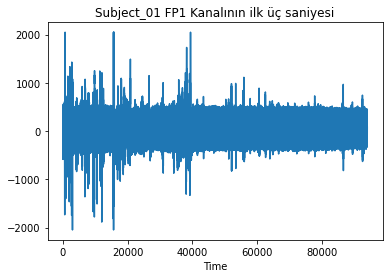

In [11]:
d_frame.drop(columns='TimeDate',inplace=True)     # ham dosyayı veri çerçevesine dönüştürme
plt.plot(d_frame['RAW'][0:])                      # Görselleştirme
plt.xlabel('Time')
plt.title('Subject_01 FP1 Kanalının ilk üç saniyesi')
d_frame.head()

Text(0.5, 1.0, 'EEG FP1 nin Dağılımı')

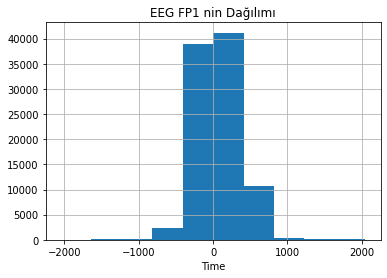

In [12]:
d_frame['RAW'].hist()
plt.xlabel('Time')
plt.title('EEG FP1 nin Dağılımı')

In [13]:
Raw_data_paths = sorted(glob("C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset/*"))

In [14]:
len(Raw_data_paths)

6

In [15]:
Raw_data_paths

['C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset\\Readme.txt',
 'C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset\\Subject00_0.csv',
 'C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset\\Subject01_1.csv',
 'C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset\\Subject02_0.csv',
 'C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset\\Subject03_1.csv',
 'C:/Users/isaco/OneDrive/Belgeler/python-projects/Biomedical/EEG_Dataset\\Subject04_0.csv']

In [16]:
def create_student_data_dict(Raw_data_paths):
    raw_dic={}                                   
    for path_index in range(1,6):
        key= Raw_data_paths[path_index][-15:-4]     # subjectxx-x'i dosyalardan çıkarmak için
        data_frame=pd.read_csv(Raw_data_paths[path_index])
        data_frame.drop(columns='TimeDate',inplace=True) 
        raw_dic[key]=data_frame
    return raw_dic
raw_dic=create_student_data_dict(Raw_data_paths)

In [17]:
# raw_dic 61 DF içeren bir sözlüktür
print('raw_dic contains %d DataFrame' % len(raw_dic))

# veri çerçevesinin ilk 3 satırını yazdır exp01_user01
raw_dic['Subject00_0']

raw_dic contains 5 DataFrame


,RAW
0,129
1,-89
2,-379
3,-408
4,-124
...,...
94130,18
94131,-246
94132,-169
94133,76


In [18]:
number_of_channels= raw_dic['Subject00_0'].shape[1]
number_of_channels

1

In [19]:
names_of_channels=raw_dic['Subject01_1'].columns
names_of_channels

Index(['RAW'], dtype='object')

SIGNAL PROCESSING

In [20]:
#band pass filter between 0.5 and 40 hz
from scipy.signal import butter, lfilter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [21]:
from scipy.signal import medfilt # medyan filtre fonksiyonu içe aktar
def median(signal):# input: numpy dizisi 1D (bir sütun)
    array=np.array(signal)   
    #medyan filtresini uyguluyoruz
    med_filtered=sp.signal.medfilt(array, kernel_size=3) # medyan filtre sırasını uyguluyoruz (kernel_size=3)
    return  med_filtered # med-filtrelenmiş sinyali döndür: numpy dizisi 1D

In [22]:
#50hz'de uygulanan notch filter
def Implement_Notch_Filter(time, band, freq, ripple, order, filter_type, data):
    from scipy.signal import iirfilter
    fs   = 1/time
    nyq  = fs/2.0
    low  = freq - band/2.0
    high = freq + band/2.0
    low  = low/nyq
    high = high/nyq
    b, a = iirfilter(order, [low, high], rp=ripple, btype='bandstop',
                     analog=False, ftype=filter_type)
    filtered_data = lfilter(b, a, data)
    return filtered_data

In [23]:
def SignalProcessing(raw_dic):
    time_sig_dic={} # Boş bir sözlük, tüm zaman alanı sinyallerinin veri çerçevelerini içerecektir
    raw_dic_keys=sorted(raw_dic.keys()) # Dataframes'in anahtarlarını sıralama
    for key in raw_dic_keys:
        
        raw_df=raw_dic[key]
        time_sig_df=pd.DataFrame()
        for column in raw_df.columns:
            
            t_signal=np.array(raw_df[column]) # 1D numpy dizisindeki sinyal değerlerini kopyalıyoruz
            med_filtred=median(t_signal) # 3. sıra medyan filtresini uyguladık ve 
                                         # filtrelenmiş sinyali med_filtred'de sakladık
            fs = 50
            lowcut = 0.05
            highcut = 5
            band_pass=butter_bandpass_filter(med_filtred, lowcut, highcut, fs, order=5)
            #notch=Implement_Notch_Filter(0.02, 1, 50, 1, 2, 'butter',band_pass)
            wavelet_denoise=denoise_wavelet(band_pass,method='BayesShrink',mode='hard',wavelet='sym9',wavelet_levels=5,rescale_sigma=True)
            clean_signals=savgol_filter(wavelet_denoise, 1111, 3,mode='wrap')
            time_sig_df[column]=clean_signals
            time_sig_dic[key]=time_sig_df
    return time_sig_dic

In [24]:
time_sig_dic=SignalProcessing(raw_dic)

In [25]:
########################################################################################
# Burada zaman uzunluğu için bir df oluşturmak istedim                             
########################################################################################
time_list=[]
for i in range (1,6):
    time=(time_sig_dic[Raw_data_paths[i][-15:-4]].index.values[-1])
    time_list.append(time)
data=np.array(time_list)
time_length=pd.DataFrame(data=data,columns=['Signl length'])
time_length


,Signl length
0,94134
1,98644
2,97153
3,98767
4,98543


In [26]:
# example: 679 ==> '00679'; 50 ==> '00050'

# Yeni uzunluk 5'e eşit olana kadar girişin soluna '0'lar ekler
def normalize5(number): 
    stre=str(number)
    if len(stre)<5:
        l=len(stre)
        for i in range(0,5-l):
            stre="0"+stre
    return stre 

# Yeni uzunluk 2'ye eşit olana kadar girişin soluna '0'lar ekler
def normalize2(number):
    stre=str(number)
    if len(stre)<2:
        stre="0"+stre
    return stre

In [27]:
def Windowing(time_sig_dic):
    window_dict={} 
    columns=time_sig_dic['Subject02_0'].columns
    
    for subject_id , state in zip([0,1,2,3,4],[0,1,0,1,0]):
        file_key= 'Subject' + normalize2(int(subject_id))  +  '_' + str(state)
        dic_update=raw_dic[file_key]
        for sig_time in range(0,len(time_length)):
            sig_time_length=(time_length['Signl length'][sig_time])
            window_ID=0
            for cursor in range(0,(sig_time_length-199),50):
                end_point=cursor+200
                data=np.array(dic_update.iloc[cursor:end_point])
                window=pd.DataFrame(data=data,columns=columns)
                key='t_W'+normalize5(window_ID)+'_'+file_key
                window_dict[key]=window
                wind_dic=window_dict[key]
                window_ID=window_ID+1
    return window_dict

In [28]:
window_dict=Windowing(time_sig_dic)

In [29]:
new_frames = {k:v for (k,v) in window_dict.items() if not v.empty}

In [30]:
len(new_frames)

9742

In [31]:
sorted(new_frames.keys())[0]

't_W00000_Subject00_0'

FOURIER TRANSFORM

In [32]:
#Fourier transform function 
from scipy import fftpack # tüm fft fonksiyonları kullanmak için fftpack'i içe aktardık
from numpy.fft import *
##################### fast_fourier_transform_one_signal #################
# Inputs: Zaman sinyali 1D dizisi
# Output: Girdi ile aynı uzunluğa sahip fft bileşenlerinin 1D dizisinin genliği
def fast_fourier_transform_one_signal(t_signal):
    # t sinyaline hızlı fourier dönüşümü uyguladık
    complex_f_signal= fftpack.fft(t_signal)
    #her karmaşık sayının genliğini hesapladık
    amplitude_f_signal=np.abs(complex_f_signal)
    # Genliği döndürdük
    return amplitude_f_signal
##################### Data frames için hızlı fourier dönüşümü #################
def fast_fourier_transform(t_window):
  f_window=pd.DataFrame() # Boş bir veri çerçevesi oluşturmak, pencerenin frekans alanı sinyallerini içerecektir
  for column in t_window.columns: 
    t_signal=np.array(t_window[column]) # sütunu 1D numpy dizisine dönüştür
    f_signal= np.apply_along_axis(fast_fourier_transform_one_signal,0,t_signal)# yukarıda tanımlanan işlevi sütuna uyguladık
    f_window["freq_"+column[0:]]=f_signal # f_window'da frekans sinyalini uygun bir sütun adıyla depoladık.
  return f_window # Frekans domain windows'u dönüştür.

In [33]:
f_window_dict = {'f'+key[1:] : t_w1_df.pipe(fast_fourier_transform) for key, t_w1_df in new_frames.items()}

In [34]:
fnew_frames = {k:v for (k,v) in f_window_dict.items() if not v.empty}

In [35]:
len(fnew_frames)

9742

WAVELET TRANSFORM

In [36]:
def tf(t_freq_signal):
    
    """
    This Function is to obtian the signals in the time-frequency domian.
    
    """
    (cA, cD) = pywt.dwt(t_freq_signal, 'db1')
    x=np.concatenate((cD,cA),axis=0)
    return x

In [37]:
time_freq_dic={}
time_dic_keys=sorted(new_frames.keys())
for k in time_dic_keys:
  time_df=new_frames[k]
  time_freq_df=pd.DataFrame()
  for c in time_df.columns:
    t_freq_signal=np.array(time_df[c])
    sum_of_coff=np.apply_along_axis(tf,0,t_freq_signal)
    time_freq_df['time_freq'+c]=sum_of_coff
    time_freq_dic[k]=time_freq_df

In [38]:
time_freq_dic['t_W00000_Subject00_0']
time_freq_dic['t_W00000_Subject00_0'].columns[0]

'time_freqRAW'

In [39]:
t_f_newframes = {k:v for (k,v) in time_freq_dic.items() if not v.empty}

In [40]:
t_f_newframes['t_W00000_Subject00_0']

,time_freqRAW
0,154.149278
1,20.506097
2,-282.842712
3,61.518290
4,67.175144
...,...
195,233.345238
196,614.475793
197,193.747258
198,-268.700577


3.PROJE

In [41]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import mne
import numpy as np
import scipy as sp
import pandas as pd
from glob import glob
from IPython.display import display
import matplotlib.pyplot as plt
import math
from skimage.restoration import denoise_wavelet
from scipy.signal import savgol_filter
from scipy.signal import medfilt
import seaborn as sns
import pywt




In [42]:
df = pd.read_csv("emotions.csv")
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Columns: 2549 entries, # mean_0_a to label
dtypes: float64(2548), object(1)
memory usage: 41.5+ MB


<AxesSubplot:xlabel='label', ylabel='count'>

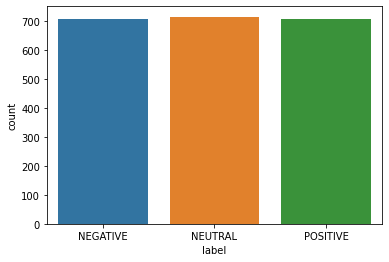

In [44]:
import seaborn as sns
sns.countplot(x='label', data=df)

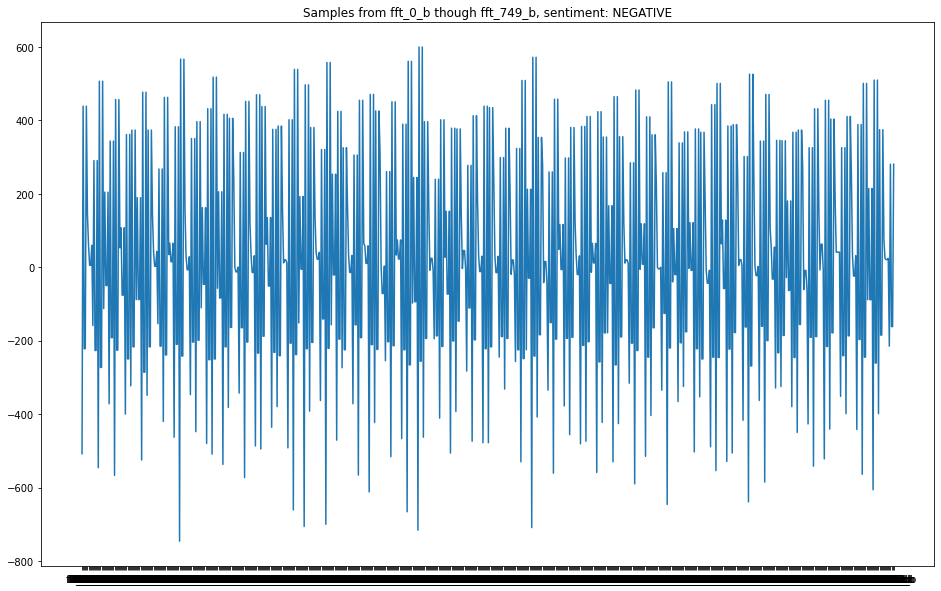

In [45]:
samples = df.loc[0, 'fft_0_b':'fft_749_b']
label = df.loc[0, 'label']
plt.figure(figsize=(16, 10))
plt.title('Samples from fft_0_b though fft_749_b, sentiment: ' + label)
plt.plot(samples)

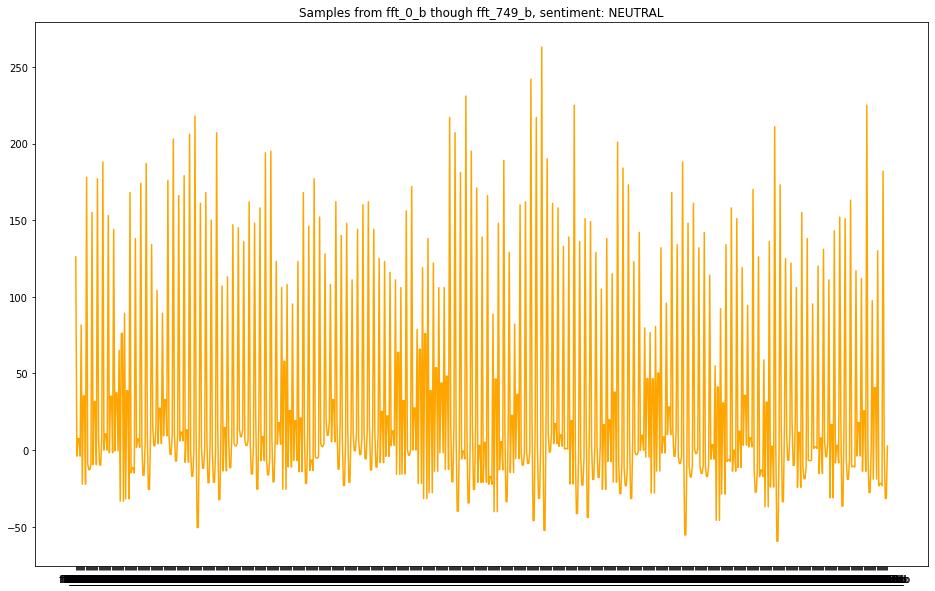

In [46]:
samples = df.loc[1, 'fft_0_b':'fft_749_b']
label = df.loc[1, 'label']
plt.figure(figsize=(16, 10))
plt.title('Samples from fft_0_b though fft_749_b, sentiment: ' + label)
plt.plot(samples, c='orange')

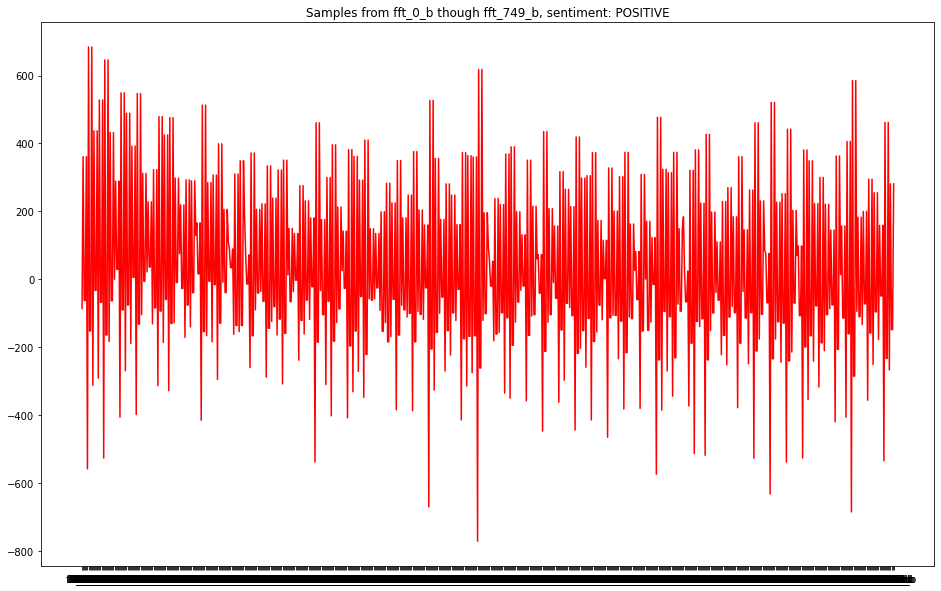

In [47]:
samples = df.loc[2, 'fft_0_b':'fft_749_b']
label = df.loc[2, 'label']
plt.figure(figsize=(16, 10))
plt.title('Samples from fft_0_b though fft_749_b, sentiment: ' + label)
plt.plot(samples, c='red')

FFT DATA KISMI

In [48]:
fft_data = df.loc[:,'fft_0_b':'fft_749_b']
fft_data

,fft_0_b,fft_1_b,fft_2_b,fft_3_b,fft_4_b,fft_5_b,fft_6_b,fft_7_b,fft_8_b,fft_9_b,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,-508.0,438.00,-222.00,-222.00,438.00,143.0,59.40,5.05,5.05,59.40,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,126.0,-4.00,7.42,7.42,-4.00,81.6,-22.30,35.30,35.30,-22.30,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,-85.9,361.00,-62.20,-62.20,361.00,-558.0,684.00,-152.00,-152.00,684.00,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,69.5,3.89,12.10,12.10,3.89,-188.0,274.00,-200.00,-200.00,274.00,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,226.0,-27.40,147.00,147.00,-27.40,301.0,-8.48,138.00,138.00,-8.48,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,105.0,3.37,29.20,29.20,3.37,151.0,-19.40,8.89,8.89,-19.40,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,-23.0,202.00,-81.60,-81.60,202.00,-345.0,404.00,-205.00,-205.00,404.00,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-288.0,312.00,-259.00,-259.00,312.00,-186.0,276.00,-199.00,-199.00,276.00,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,109.0,2.48,49.00,49.00,2.48,-230.0,216.00,-92.40,-92.40,216.00,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


<AxesSubplot:>

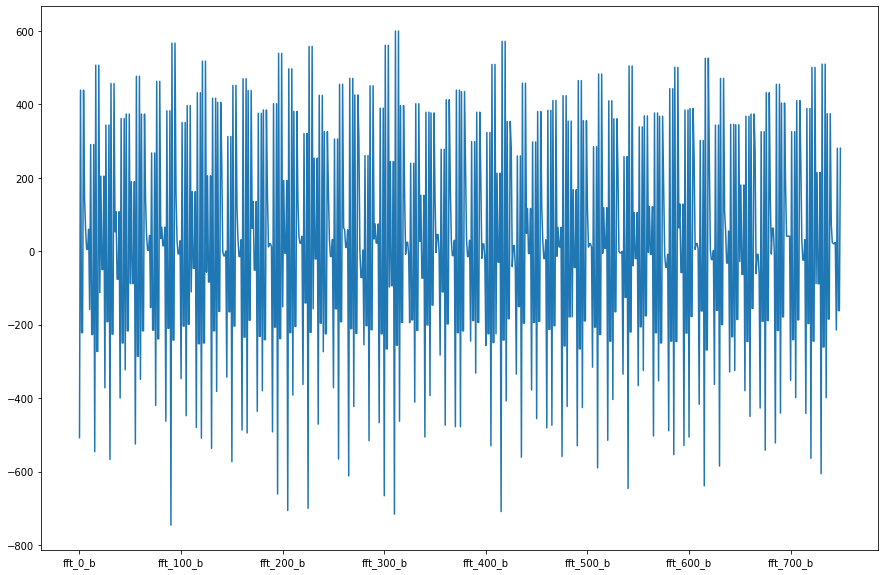

In [49]:
fft_data.iloc[0,:].plot(figsize=(15,10))